In [5]:
import json
import numpy as np
import sklearn
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import snap
import random
from numpy.random import choice
import numpy as np
from collections import defaultdict
import os
from playlist import *
data_dir = "/Users/pani/mpd/data/"
# import playlist
# reload(playlist)
# but must put playlist in front of the functions from playlist

In [6]:
data_files = list(sorted(os.listdir(data_dir)))

In [8]:
data_files = data_files[:1]

In [9]:
all_playlists = []
for file_number, data_file in enumerate(data_files):
#     print(file_number, data_file)
    with open(data_dir + data_file) as file:
        data = json.load(file)
        playlists = data['playlists']
        all_playlists += playlists

In [10]:
playlist_list = all_playlists
len(playlist_list)

1000

In [11]:
import sys
sys.getsizeof(all_playlists)

9120

In [12]:
track_embedding_df = pd.read_csv("word2vecf-features.txt", skiprows=1, header=None, sep=' ')
track_embedding_df = track_embedding_df.set_index(0)
track_embedding_df = track_embedding_df.drop(columns=[track_embedding_df.shape[1]])
track_embedding_df.columns

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', length=200)

In [13]:
track_embedding_df.shape

(457016, 200)

In [14]:
track_embedding_df.head()

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,,,,,,,,,,,,,,,,,,,,,
spotify:track:0uqPG793dkDDN7sCUJJIVC,-0.026026,-0.083628,0.134833,0.012421,-0.159434,0.083758,0.001227,0.001863,-0.146504,-0.051575,...,-0.039538,0.141645,-0.068446,-0.015492,0.070452,0.078635,0.020971,-0.100852,0.051009,0.062138
spotify:track:7KXjTSCq5nL1LoYtL7XAwS,-0.060636,-0.199347,0.314352,0.025642,-0.353024,0.195261,-0.004815,0.002842,-0.332577,-0.112377,...,-0.096747,0.329734,-0.157763,-0.042936,0.174929,0.186213,0.051125,-0.233378,0.112793,0.141836
spotify:track:1xznGGDReH1oQq0xzbwXa3,-0.054589,-0.198523,0.304365,0.030382,-0.352851,0.190760,-0.004005,-0.000292,-0.327377,-0.113400,...,-0.096744,0.326155,-0.152823,-0.043379,0.171734,0.178939,0.046186,-0.229613,0.109953,0.145087
spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,-0.052947,-0.183444,0.292234,0.033237,-0.349599,0.189332,-0.005676,0.005607,-0.321430,-0.123372,...,-0.097007,0.315117,-0.155333,-0.035356,0.174856,0.180012,0.045895,-0.226134,0.112212,0.136915
spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,-0.055421,-0.196512,0.303226,0.034056,-0.365354,0.192383,0.004406,0.005574,-0.333833,-0.114642,...,-0.089055,0.321614,-0.157704,-0.041348,0.168048,0.183240,0.048365,-0.223629,0.109537,0.140058


In [28]:
# track_embedding_df.loc['spotify:track:0uqPG793dkDDN7sCUJJIVC']

In [16]:
# playlist_list[0]['tracks'][0]['track_uri']
# ((playlist_list[0]['num_tracks']))

In [17]:
def get_track_embedding(track_uri):
    return track_embedding_df.loc[track_uri].values

In [18]:
get_track_embedding('spotify:track:0uqPG793dkDDN7sCUJJIVC').shape

(200,)

In [19]:
cached_playlist_embedding = {}

def get_playlist_embedding(playlist_id):
    # check if already in cache 
    if playlist_id in cached_playlist_embedding:
        return cached_playlist_embedding[playlist_id]

    embedding_list = []
    for i in range(playlist_list[playlist_id]['num_tracks']):
        track_uri = playlist_list[playlist_id]['tracks'][i]['track_uri']
    #     print(type(track_df.loc[track_uri]))
        embedding_list.append(get_track_embedding(track_uri))
    embedding = np.mean(embedding_list, axis = 0)
    # put in the cache
    cached_playlist_embedding[playlist_id] = embedding
    return embedding

In [20]:
# get_track_embedding('spotify:track:0uqPG793dkDDN7sCUJJIVC').shape
get_playlist_embedding(0).shape

(200,)

In [21]:
def cal_similarity(playlist_id_1, playlist_id_2):
        similarity = sklearn.metrics.pairwise.cosine_similarity(get_playlist_embedding(playlist_id_1).reshape(1, -1), 
                                                                get_playlist_embedding(playlist_id_2).reshape(1, -1))
        return similarity[0][0]
        

In [35]:
%%timeit
cal_similarity(1, 5)

The slowest run took 151.68 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 110 µs per loop


In [22]:
def biased_w2v_random_walk_playlist(query,g, beta = 1000):
    
    N = 1000
#     totSteps is the number of total steps where step is going from playlist to track to playlist
    totSteps = 0
#     nHighVisited is the number of track nodes that have been visited at least nv times
    nHighVisited = 0
    nv = 5
#     nt is the least number of tracks which have been visited at least nv times
    nt = 200
    num_visits = defaultdict(int)
    
    def weight_cal(edge):
        weight = cal_similarity(query,edge)
        return weight

    while totSteps < N or nHighVisited > nt: 
        currPlaylist = query
        # Number of iterations
        currSteps = 5
        for i in range(currSteps):
            # takes 1 step (from a playlist to track)
            edges = list(g.GetNI(currPlaylist).GetOutEdges())
            currTrack = random.choice(edges)
            # takes 1 step (from a track to playlist)
            edges = list(g.GetNI(currTrack).GetOutEdges())
#             weights = [f(edge) for edge in edges]
            weights = [weight_cal(edge) for edge in edges]
            weights_np = np.asarray(weights)

# uncomment to do softmax
# see https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python
#             # this bit makes it more stable numerically
            max_weight = np.max(weights_np)
            weights_np -= max_weight
            # but does not change the answer
            weights_np = np.exp(beta * weights_np)

            prob_dis = weights_np / float(sum(weights_np))
            currPlaylist = int(choice(edges, 1, p=prob_dis))
            num_visits[currTrack] += 1
            if num_visits[currTrack] == nv:
                nHighVisited += 1
        totSteps += currSteps
    return num_visits

In [54]:
def cal_most_visited_playlist(playlist_list, playlist_id):
    dropped_track_index = random.choice(range(len(playlist_list[playlist_id])))
#         for dropped_track_index in range(len(playlist_list[playlist_id])):
    g, dropped_track_id = make_graph_drop_edge(playlist_list, playlist_id, dropped_track_index)
#             print('1', playlist_id, dropped_track_id)
#             tracks in the playlist graphs where one is dropped
    if len(list(g.GetNI(playlist_id).GetOutEdges())) < 5:
        return None, None
    query = playlist_id
    num_visits = biased_w2v_random_walk_playlist(query,g)
#     num_visits = highest_visited_random_walk_playlist(query, g)
#     num_visits =biased_modified_at_random_walk_playlist(query, g)
    suggested_ids = sorted(num_visits, key=num_visits.get, reverse=True)
    return dropped_track_id, suggested_ids


In [55]:
# all_true_ids, all_suggested_ids = cal_most_visited(playlist_list)
all_true_ids, all_suggested_ids = process_playlists(cal_most_visited_playlist, playlist_list, multiprocess=False)

In [56]:
avg_precision = cal_ave_precision(500, all_true_ids, all_suggested_ids)
print avg_precision

0.157520325203


In [72]:
type(all_true_ids[0])

int

In [74]:
import math
def dcg(gains):
    value = 0
    for index, gain in enumerate(gains):
        if index == 0:
            value += gain
        else:
            value += gain/math.log(1+index)
    return value

In [75]:
def ndcg(gains):
    ideal_gains = list(sorted(gains))     
    ideal_dcg = dcg(ideal_gains)
    if ideal_dcg == 0:
        return 0.0
    real_dcg = dcg(gains)
    return real_dcg/ideal_dcg

In [76]:
def get_gain(playlist_index, true_index, indices):
    gains = []
    for index in indices:
        if index == true_index:
            gains.append(1)
#         elif is_same_artist(playlist_index, true_index, index):
#         elif is_same_playlist(track_playlists, true_index, index):
#             gains.append(1)
        else:
            gains.append(0)
    return gains

In [77]:
def is_same_playlist(track_playlists, track1, track2):
    if track_playlists[track1].intersection(track_playlists[track2]):
        return True
    return False

In [78]:
from collections import defaultdict
def make_track_playlists(playlist_list):
    track_playlists = defaultdict(set)
    for playlist_index, playlist in enumerate(playlist_list):
        for track_uri in get_tracks(playlist):
            track_playlists[track_uri].add(playlist_index)
    return track_playlists

limited_playlist_list = playlist_list[:1000]
track_playlists = make_track_playlists(limited_playlist_list)

In [79]:
is_same_playlist(track_playlists, "spotify:track:0uqPG793dkDDN7sCUJJIVC", "spotify:track:0uqPG793dkDDN7sCUJJIVC")

True

In [69]:
def cal_ndcg(track_playlists, all_true_indices, all_indices):
    result = 0
    count = 0
    for true_index, indices in zip(all_true_indices, all_indices):
        playlist_index = count
        gains = get_gain(playlist_index, true_index, indices[0,:])
        result += ndcg(gains)
        count += 1
    return result / count

In [89]:
all_suggested_ids_np = [np.array(all_suggested_id).reshape(1,-1)
                        for all_suggested_id in all_suggested_ids]
cal_ndcg(track_playlists, all_true_ids, all_suggested_ids_np)

0.21603858617350727

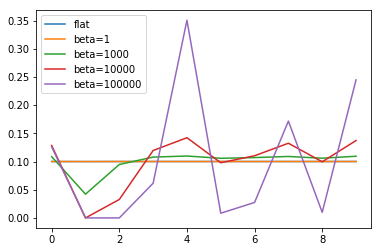

In [15]:
import matplotlib.pyplot as plt

weights = [cal_similarity(0, 1+i) for i in range(10)]
weights_np = np.asarray(weights)
prob_dis = weights_np / float(sum(weights_np))
plt.plot(prob_dis, label="flat")
for beta in [1,1000,10000,100000]:
    weights_np = np.asarray(weights)
    # this bit makes it more stable numerically
    max_weight = np.max(weights_np)
    weights_np -= max_weight
    # but does not change the answer
    weights_np = np.exp(beta * weights_np)

    prob_dis = weights_np / float(sum(weights_np))
    plt.plot(prob_dis, label="beta=" + str(beta))
plt.legend()
plt.show()